### IMPORTING LIBRARIES/DATASETS AND PERFORMING EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# Read the stock data file
stock_df=pd.read_csv("stocks_dataset.csv")
stock_df.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000


In [ ]:
# Getting dataframe info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


### PERFORMING DATA SCALING

In [ ]:
#scaling so that initial price of all securities is 1 diivide the col with initial price

In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
    x=df.copy()
    #slicing the date column
    for i in x.columns[1:]:
        x[i]=x[i]/x[i][0]
    return x



In [ ]:
stocks_df=normalize(stock_df)
stocks_df

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
2,11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
3,11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
4,11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
1695,8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
1696,8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685
1697,8/6/2020,5.577796,0.839421,10.902404,1.309406,0.849900,0.993541,10.657365,1.916927


### PERFORMING DATA VISUALIZATION

In [ ]:
# Function to plot interactive plot
def interactive_plot(df,Title):
    fig=px.line(title=Title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df["Date"],y=df[i],name=i)
    fig.show()







In [ ]:
# Plot interactive chart

interactive_plot(stock_df,"stock prices")

In [ ]:
# Plot normalized interactive chart
interactive_plot(stocks_df,"normalized stocks")

### DEVELOPING A FUNCTION TO CALCULATE DAILY RETURNS

In [ ]:
# Function to calculate the daily returns
def daily_return(df):
    x=df.copy()
    for i in df.columns[1:]:
        for j in range(1,len(df[i])):

              x[i][j]=((df[i][j]-df[i][j-1])/df[i][j-1])*100

        x[i][0]=0
    return x










In [ ]:
stock_daily_return=daily_return(stock_df)
stock_daily_return.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
2,11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
3,11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
4,11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534


### CALCULATING BETA FOR TESLA STOCK

In [ ]:
# Select any stock, let's say Apple
stock_daily_return["TSLA"]

0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

In [ ]:
# Select the S&P500 (Market)
stock_daily_return["sp500"]

0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

<Axes: xlabel='sp500', ylabel='TSLA'>

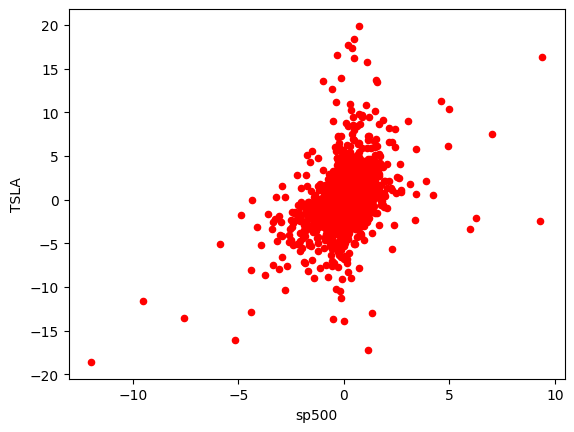

In [ ]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stock_daily_return.plot(kind="scatter",x="sp500",y="TSLA",color="red")


In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stock_daily_return['sp500'], stock_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))

Beta for TSLA stock is = 1.2359723602006576 and alpha is = 0.137162009932369


In [ ]:
#as beta>1 stock more volatile than market (23% more volatile)

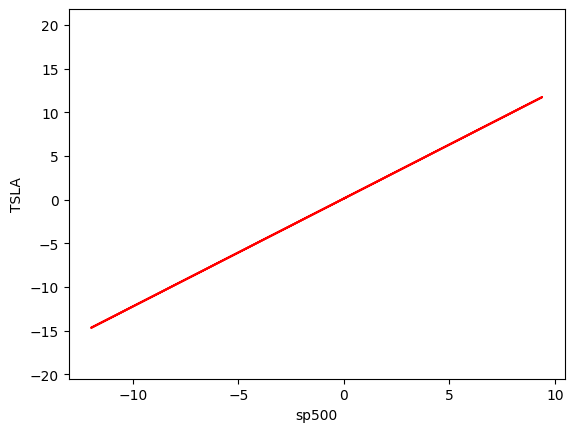

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stock_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'w')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
#line plot
plt.plot(stock_daily_return['sp500'], beta * stock_daily_return['sp500'] + alpha, '-', color = 'r')


Beta for MGM stock is = 1.6517124147928917 and alpha is = -0.030189775264089152


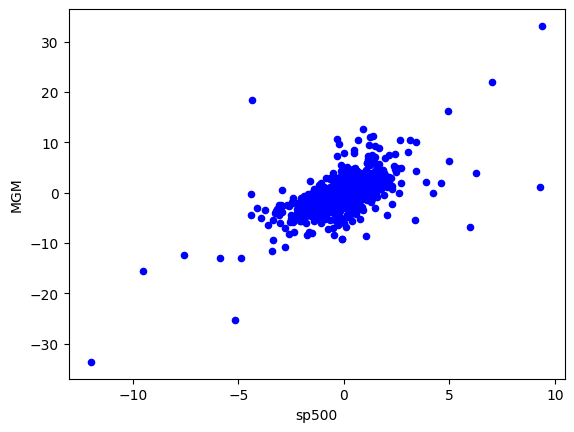

In [ ]:
stock_daily_return.plot(kind="scatter",x="sp500",y="MGM",color="blue")

beta, alpha=np.polyfit(stock_daily_return["sp500"],stock_daily_return["MGM"],1)
print('Beta for {} stock is = {} and alpha is = {}'.format('MGM', beta, alpha))
# mgm stock more volatile than market (65%)



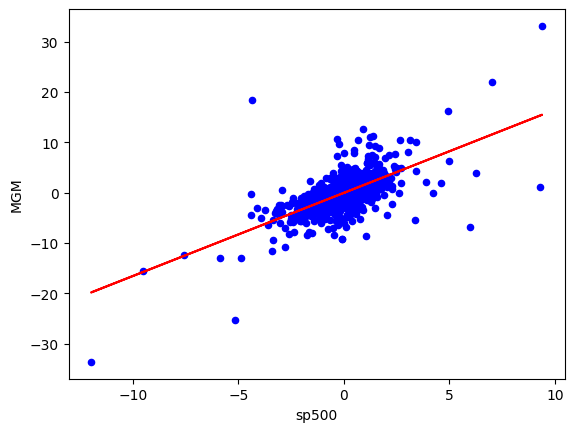

In [ ]:
stock_daily_return.plot(kind="scatter",x="sp500",y="MGM",color="blue")
plt.plot(stock_daily_return["sp500"],beta*stock_daily_return["sp500"]+alpha,color="r")

### APPLYING THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [ ]:
beta

1.6517124147928917

In [ ]:
# Let's calculate the average daily rate of return for S&P500
stock_daily_return["sp500"].mean()

0.04457361768265508

In [ ]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
annual_return_mgm=stock_daily_return["sp500"].mean()*252
rm=annual_return_mgm

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf=0
# Calculate return for any security (mgm) using CAPM
ex_return_mgm=rf+beta*(rm-rf)
ex_return_mgm

18.55294502006569

### CALCULATING BETA FOR ALL STOCKS

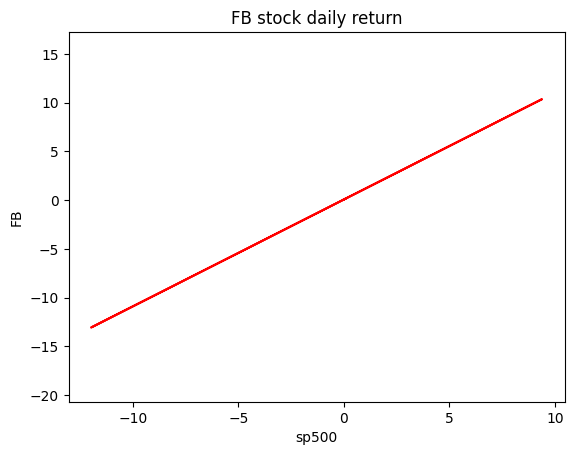

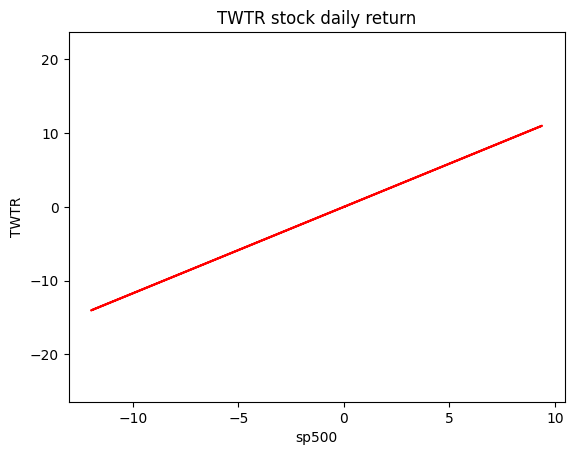

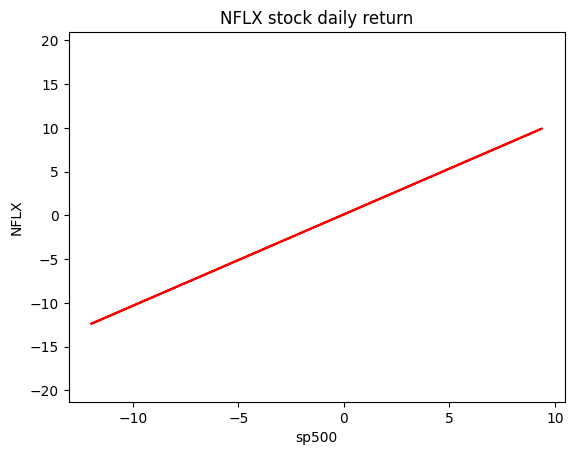

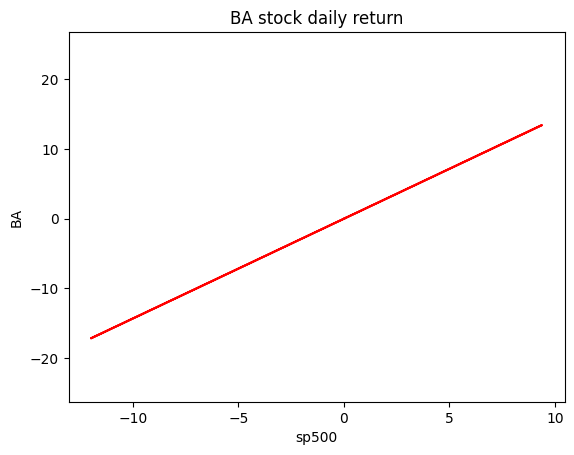

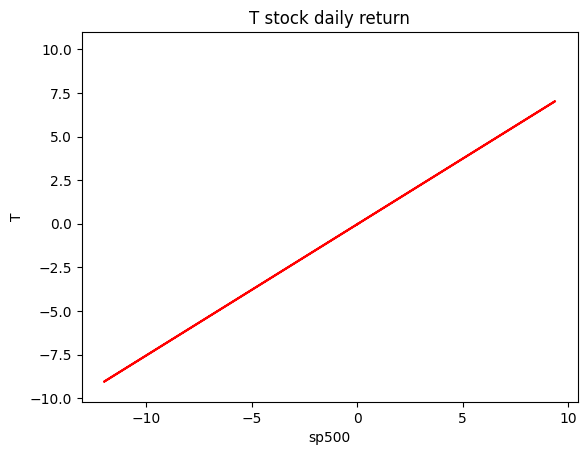

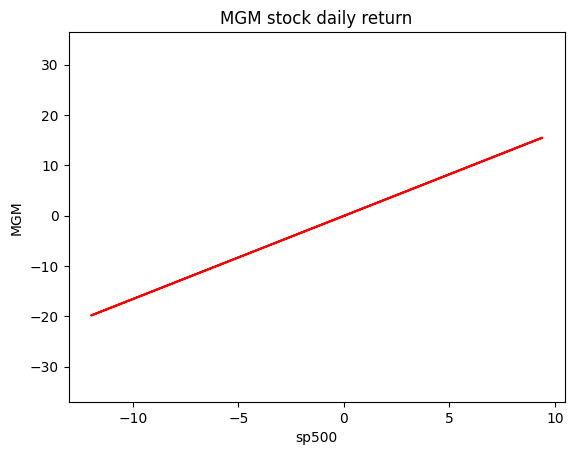

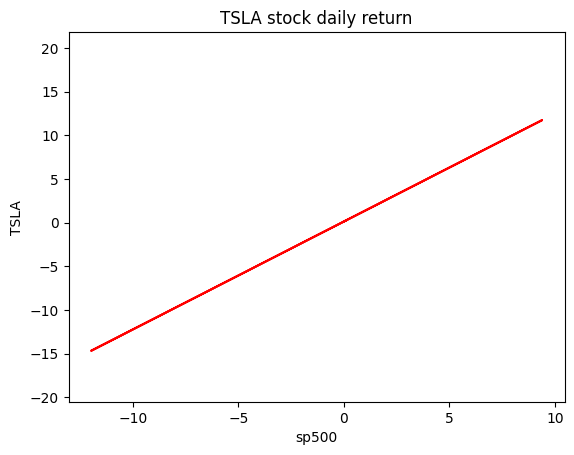

In [ ]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stock_daily_return.columns:

  # Ignoring the date and S&P500 Columns
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stock_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'w',title=i+" stock daily return")

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stock_daily_return['sp500'], stock_daily_return[i], 1)

    plt.plot(stock_daily_return['sp500'], b * stock_daily_return['sp500'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [ ]:
# Let's view Beta for every stock
beta

{'FB': 1.096849088020326,
 'TWTR': 1.172359618315995,
 'NFLX': 1.0445724485449472,
 'BA': 1.4304608163084231,
 'T': 0.7523861924715606,
 'MGM': 1.6517124147928917,
 'TSLA': 1.2359723602006576}